In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
df = pd.read_csv("../../Data/processed/final.csv")

In [79]:
df['has_https'] = df['url'].str.startswith('https://').astype(int)

In [80]:
TARGET_COL = 'result'

feature_cols = [
    'num_dots',
    'num_hyphens', 
    'num_slashes',
    'num_digits',
    'num_equals',
    'ip_in_url',
    'has_highly_susp_keyword',
    'hostname_length',
    'has_additional_susp_words',
    'has_susp_word_in_path',
    'has_susp_word_in_hostname',
    'has_suspicious_tld',
    'has_uncommon_tld',
    'url_entropy',
    'subdomain_count',
    'tld_length',
    'short_url',
    'consonant_pair_ratio',
    'punctuation_density',
    'hex_encoding_count',
    'num_subdirs',
    'has_https',
    'AtSymbol',
    'NumUnderscore',
    'HasQueryString',
    # 'filename_length',

    'path_length',
    'max_dir_length',

    'hostname_uncommonness',
    'longest_dir_uncommonness'
]


X = df[feature_cols]  
y = df[TARGET_COL]   

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
)
lr_model.fit(X_train_scaled, y_train)
print("LR model trained .")

LR model trained .


In [84]:
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

In [85]:
from IPython.display import Markdown, display
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

display(Markdown(f"**Accuracy:** `{accuracy:.4f}`"))
display(Markdown(f"**precision:** `{precision:.4f}`"))
display(Markdown(f"**recall:** `{recall:.4f}`"))
display(Markdown(f"**f1:** `{f1:.4f}`"))

display(Markdown(f"**Matrice de confusion:**\n```\n{conf}\n```"))
display(Markdown(f"**Rapport de classification:**\n```\n{report}\n```"))


**Accuracy:** `0.9912`

**precision:** `0.9967`

**recall:** `0.9793`

**f1:** `0.9879`

**Matrice de confusion:**
```
[[69017   131]
 [  826 39123]]
```

**Rapport de classification:**
```
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     69148
         1.0       1.00      0.98      0.99     39949

    accuracy                           0.99    109097
   macro avg       0.99      0.99      0.99    109097
weighted avg       0.99      0.99      0.99    109097

```

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = lr_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_binary)


print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")


Accuracy: 0.3734 (37.34%)
Precision: 0.9967 (99.67%)
Recall: 0.9793 (97.93%)
F1-Score: 0.9879 (98.79%)


c:\Users\Lenovo\Documents\FSTE\S4\AI\project\Malicious-URLs\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.01      0.02     69148
         1.0       0.37      1.00      0.54     39949

    accuracy                           0.37    109097
   macro avg       0.67      0.51      0.28    109097
weighted avg       0.75      0.37      0.21    109097

[[  804 68344]
 [   20 39929]]


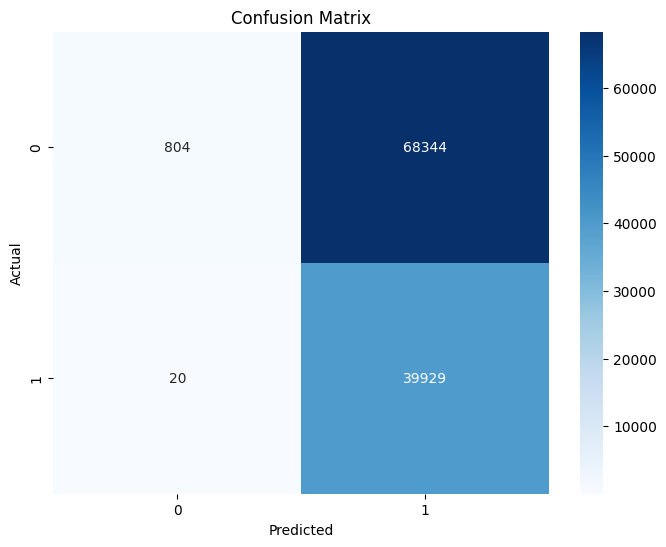

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(X_test)

false_negatives_mask = (y_test == 1) & (y_pred == 0)

false_negatives = X_test[false_negatives_mask]
false_negatives['actual_result'] = y_test[false_negatives_mask]
false_negatives['predicted_result'] = y_pred[false_negatives_mask]

print(false_negatives.head())


        num_dots  num_hyphens  num_slashes  num_digits  num_equals  ip_in_url  \
355045        18            6           18          11           0          0   
362981         3            0           21           1           0          0   
362965         3            0           24           1           0          0   
543251         3           18            3           1           3          0   
432322         3           16            5           8           0          0   

        has_highly_susp_keyword  hostname_length  has_additional_susp_words  \
355045                        1               17                          0   
362981                        0               15                          0   
362965                        0               15                          0   
543251                        0               20                          0   
432322                        1               22                          0   

        has_susp_word_in_path  ...  ha

c:\Users\Lenovo\Documents\FSTE\S4\AI\project\Malicious-URLs\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6920\4095587136.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_negatives['actual_result'] = y_test[false_negatives_mask]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6920\4095587136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [90]:
print(X_test.columns)


Index(['num_dots', 'num_hyphens', 'num_slashes', 'num_digits', 'num_equals',
       'ip_in_url', 'has_highly_susp_keyword', 'hostname_length',
       'has_additional_susp_words', 'has_susp_word_in_path',
       'has_susp_word_in_hostname', 'has_suspicious_tld', 'has_uncommon_tld',
       'url_entropy', 'subdomain_count', 'tld_length', 'short_url',
       'consonant_pair_ratio', 'punctuation_density', 'hex_encoding_count',
       'num_subdirs', 'has_https', 'AtSymbol', 'NumUnderscore',
       'HasQueryString', 'path_length', 'max_dir_length',
       'hostname_uncommonness', 'longest_dir_uncommonness'],
      dtype='object')


In [91]:
print(false_negatives.describe())


        num_dots  num_hyphens  num_slashes  num_digits  num_equals  ip_in_url  \
count  20.000000    20.000000    20.000000   20.000000   20.000000       20.0   
mean    5.650000     8.500000     9.600000    4.100000    0.900000        0.0   
std     4.648429     7.762935     5.798366    4.666792    2.074913        0.0   
min     1.000000     0.000000     3.000000    0.000000    0.000000        0.0   
25%     3.000000     1.000000     6.000000    0.750000    0.000000        0.0   
50%     3.000000     7.000000     8.000000    2.000000    0.000000        0.0   
75%     7.250000    16.500000    11.000000    8.000000    1.000000        0.0   
max    18.000000    22.000000    24.000000   14.000000    9.000000        0.0   

       has_highly_susp_keyword  hostname_length  has_additional_susp_words  \
count                20.000000        20.000000                       20.0   
mean                  0.450000        16.200000                        0.0   
std                   0.510418      

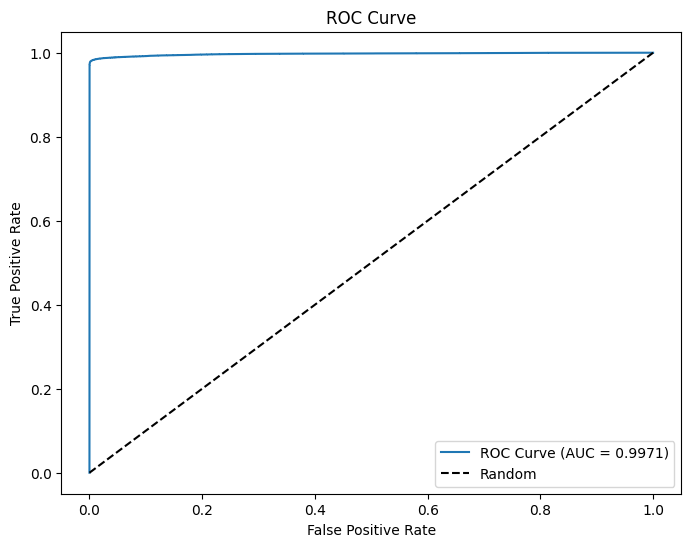

In [92]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
print("\n" + "="*50)
print("MODEL SUMMARY")
print("="*50)
print(f"Model: Logistic Regression")
print(f"Features used: {len(feature_cols)}")
print(f"Training accuracy: {lr_model.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {lr_model.score(X_test_scaled, y_test):.4f}")


MODEL SUMMARY
Model: Logistic Regression
Features used: 26
Training accuracy: 0.9688
Test accuracy: 0.9689


In [ ]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold by ROC: {optimal_threshold:.4f}")

recall_95_idx = np.where(tpr >= 0.95)[0]
if len(recall_95_idx) > 0:
    recall_95_threshold = thresholds[recall_95_idx[0]]
    print(f"Threshold for 95% recall: {recall_95_threshold:.4f}")

test_thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

print("\nThreshold Analysis:")
print("Threshold | Precision | Recall | F1-Score | FP | FN")
print("-" * 55)

best_f1 = 0
best_threshold = 0.5

for threshold in test_thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"{threshold:9.2f} | {precision:9.3f} | {recall:6.3f} | {f1:8.3f} | {fp:2d} | {fn:2d}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold} (F1-score: {best_f1:.3f})")

Optimal threshold by ROC: 0.3916
Threshold for 95% recall: 0.1536

Threshold Analysis:
Threshold | Precision | Recall | F1-Score | FP | FN
-------------------------------------------------------
     0.10 |     0.576 |  0.967 |    0.722 | 14864 | 692
     0.15 |     0.711 |  0.951 |    0.814 | 8075 | 1026
     0.20 |     0.782 |  0.943 |    0.855 | 5500 | 1196
     0.25 |     0.833 |  0.937 |    0.882 | 3917 | 1312
     0.30 |     0.870 |  0.932 |    0.900 | 2912 | 1412
     0.35 |     0.905 |  0.928 |    0.917 | 2034 | 1497
     0.40 |     0.928 |  0.924 |    0.926 | 1500 | 1581
     0.45 |     0.944 |  0.918 |    0.931 | 1144 | 1704
     0.50 |     0.959 |  0.914 |    0.936 | 807 | 1804

Best threshold: 0.5 (F1-score: 0.936)
